# Analyzing Helicopter Prison Escapes: A Data-Driven Approach

We will analyze the intriguing phenomenon of heelicopter prison escapes using data from Wikipedia. We will use Python's powerful data manipulation libraries, **'numpy'** and **'pandas'**, along with the visualization library **'matplotlib'**, to uncover trends and insights from the data. Let's dive in! 

### Loading the Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Getting the data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts) Wikipedia article.

In [75]:
# Fetch the data from Wikipedia
url ="https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
df= pd.read_html(url)[1]
data= df.to_numpy().tolist()

# Display few data
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[5] It also inspired the 1975 action movie Breakout, 

### Data Preprocessing

To make our analysis easier, we need to clean and preprocess the data. We'll remove unnecessary columns and extract the year from the date.

In [82]:
# Remove the last column from each row
index = 0 
for row in data:
    data[index] = row[:-1]
    index+=1
# Display the first five row of data
print(data[:5])

[['1971', 'Santa Martha Acatitla', 'Mexico', 'Yes'], ['1973', 'Mountjoy Jail, Dublin', 'Ireland', 'Yes'], ['1978', 'United States Penitentiary, Marion, Illinois', 'United States', 'No'], ['1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes'], ['1981', 'Orsainville Prison, Quebec City', 'Canada', 'No']]


In [77]:
# Extract the year from the date
for row in data:
    row[0] = row[0].split()[-1]
for row in data:
    
    # Display all the year
    print(row[0])
    

1971
1973
1978
1981
1981
1983
1985
1985
1986
1986
1986
1987
1988
1989
1989
1990
1991
1992
1992
1993
1996
1997
1999
2000
2000
2001
2001
2001
2002
2002
2003
2005
2005
2006
2007
2007
2007
2009
2009
2009
2010
2012
2013
2013
2014
2016
2018
2020


We have six columns, which are all self-descriptive. In this project, we'll answer the following questions:
1. In which year did the most helicopter prison break attempts occur?
2. In which countries do the most attempted helicopter prison escapes occur?


### Anayzing Attempts Per Year

Next, we will analyze the number of helicopter prison attempts per year. We'll identify the range of years and count the attempts for each year.


In [78]:
# Find the range of years in the data
min_year = min(data, key= lambda x: int(x[0]))[0]
max_year = max(data, key= lambda x: int(x[0]))[0]
years = list(range(int(min_year),int(max_year)+1))

# Initialize the counts for each year
attempts_per_year = [[year,0] for year in years]

In [79]:
# Count the number of attempts for each year
for row in data:
    for year_attempt in attempts_per_year:
        year = year_attempt[0]
        
        if int(row[0]) == year:
            year_attempt[1] += 1

# Display the year, and the number of attempts
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


### Visualizing Attempts Per Year

Using **'matplotlib'**, we'll create a bar chart to visualize the number of attempts per year.

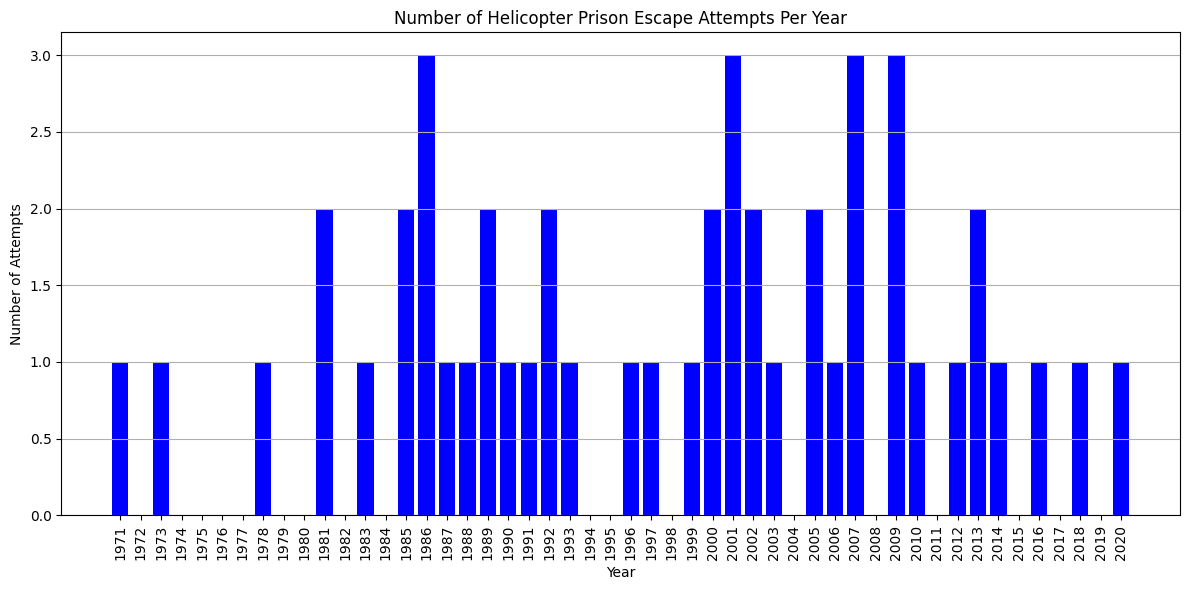

In [80]:
# Extract the number of attempts for each year
years= [year_attempt[0] for year_attempt in attempts_per_year]
attempts = [year_attempt[1] for year_attempt in attempts_per_year]

# Plot the number of attempts per year
plt.figure(figsize=(12,6))
plt.bar(years,attempts,color="blue")
plt.xlabel('Year')
plt.ylabel('Number of Attempts')
plt.title('Number of Helicopter Prison Escape Attempts Per Year')
plt.xticks(years,rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Analyzing Attempts by Country

We are also interested in knowing which countries have experienced the most helicopter prison escape attempts. We'll count the attempts for each country and display the results.

In [81]:
# Count the number of attempts per country
country_counts ={}
for row in data:
    country=row[2]
    if country in country_counts:
        country_counts[country] +=1
    else:
        country_counts[country] = 1
# Create a DataFrame and sort it
country_df = pd.DataFrame(list(country_counts.items()), columns = ['Country','Number of Attempts'])
country_df = country_df.sort_values(by='Number of Attempts', ascending = False).reset_index(drop=True)

# Display the DataFrame
print(country_df)

           Country  Number of Attempts
0           France                  15
1    United States                   8
2           Canada                   4
3           Greece                   4
4          Belgium                   4
5        Australia                   2
6           Brazil                   2
7   United Kingdom                   2
8           Mexico                   1
9          Ireland                   1
10           Italy                   1
11     Puerto Rico                   1
12           Chile                   1
13     Netherlands                   1
14          Russia                   1


### Conclusion

By analyzing helicopter prison escapes attempts over the years and across countries, we can gain valuable insights into this unique phenomenon. This analysis not only demonstrates the power of data science in uncovering patterns and trends but also highlights the importance of effective data visualization.

We found that the years 1985, 2001, 2007 and 2009 had the highest number of helicopter escape attempts. Additionaly, the country with the highest number of helicopter escapes is **France** .